In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tickers=['AAPL','MSFT','GOOGL']
weights = [0.4,0.3,0.3]
start_date = '2023-01-01'
end_date = '2024-01-01'

In [4]:
data = yf.download(tickers,start = start_date , end = end_date)

[*********************100%***********************]  3 of 3 completed


In [5]:
data.head()

Price            Close                               High             \
Ticker            AAPL      GOOGL        MSFT        AAPL      GOOGL   
Date                                                                   
2023-01-03  123.470612  88.588707  234.808945  129.226052  90.507201   
2023-01-04  124.744125  87.554909  224.537659  127.014716  90.109587   
2023-01-05  123.421257  85.686104  217.882889  126.136090  87.047939   
2023-01-06  127.962448  86.819313  220.450668  128.623879  87.167233   
2023-01-09  128.485657  87.495255  222.597076  131.703978  89.513159   

Price                          Low                               Open  \
Ticker            MSFT        AAPL      GOOGL        MSFT        AAPL   
Date                                                                    
2023-01-03  240.856072  122.582119  87.992278  232.672350  128.613985   
2023-01-04  228.232571  123.480495  86.749732  221.460190  125.267347   
2023-01-05  223.018544  123.164587  85.387897  217.343839  125.504275   
2023-01-06  221.264141  123.292938  84.354102  214.981803  124.398619   
2023-01-09  226.635040  128.228987  87.336212  221.901224  128.801572   

Price                                 Volume                      
Ticker          GOOGL        MSFT       AAPL     GOOGL      MSFT  
Date                                                              
2023-01-03  89.055899  238.239245  112117500  28131200  25740000  
2023-01-04  89.811373  227.654324   89113600  34854800  50623400  
2023-01-05  86.948537  222.675508   80962700  27194400  39585600  
2023-01-06  86.272596  218.559110   87754700  41381500  43613600  
2023-01-09  87.833232  221.940421   70790800  29003900  27369800

In [9]:
data1 = data['Close']

In [10]:
data1

Ticker,AAPL,GOOGL,MSFT
Date,,,
2023-01-03,123.470612,88.588707,234.808945
2023-01-04,124.744125,87.554909,224.537659
2023-01-05,123.421257,85.686104,217.882889
2023-01-06,127.962448,86.819313,220.450668
2023-01-09,128.485657,87.495255,222.597076
...,...,...,...
2023-12-22,192.192566,140.646500,370.375732
2023-12-26,191.646545,140.676315,370.454865
2023-12-27,191.745804,139.533173,369.871490


In [11]:
normalized = data1 / data1.iloc[0]

In [13]:
portfolio = (normalized*weights).sum(axis=1)

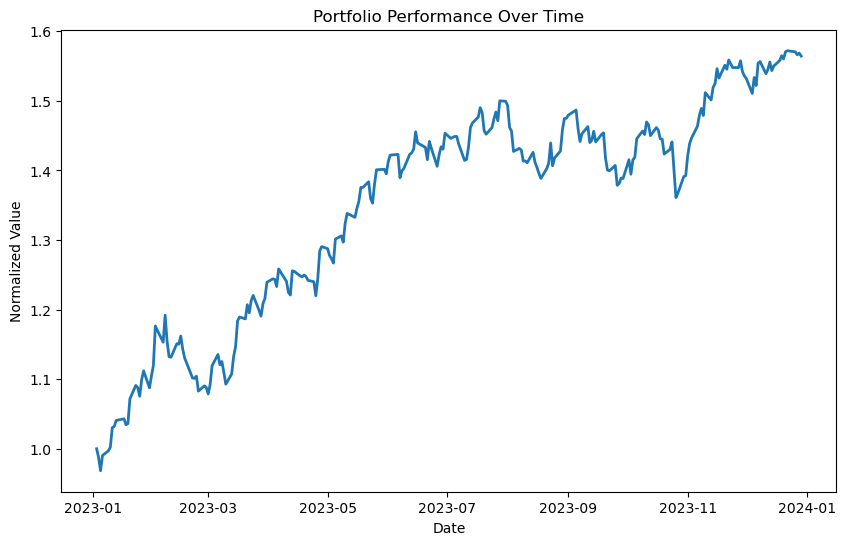

In [14]:
plt.figure(figsize=(10,6))
plt.plot(portfolio, label ="Portfolio Value",linewidth=2)
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Portfolio Performance Over Time')
plt.show()

In [15]:
returns = portfolio.pct_change().dropna()
annual_return = returns.mean() * 252

# Annualized volatility
annual_volatility = returns.std() * (252 ** 0.5)

# Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = annual_return / annual_volatility

print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Annual Return: 47.40%
Annual Volatility: 20.38%
Sharpe Ratio: 2.33
